<a href="https://colab.research.google.com/github/Balajivasudevan03/Delhivery_case_study/blob/main/Delhivery_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom , norm , poisson , expon , ttest_ind , shapiro , levene , probplot , kruskal , chi2_contingency , f_oneway
import warnings
from sklearn.preprocessing import StandardScaler , MinMaxScaler
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df['trip_uuid'].value_counts()
df[df['trip_uuid']=="trip-153811219535896559"]
# As we can see we have multiple rows per Trip UUID

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
10611,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,...,2018-09-29 08:47:35,24.400438,33.0,19.0,27.4395,1.736842,33.0,19.0,27.4395,1.736842
10612,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,...,2018-09-29 08:26:39,44.613465,54.0,34.0,48.7741,1.588235,20.0,15.0,21.3346,1.333333
10613,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,...,2018-09-29 07:59:36,66.498458,81.0,53.0,74.7637,1.528302,27.0,18.0,25.9896,1.500000
10614,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,...,2018-09-29 07:08:35,90.441670,132.0,90.0,113.1110,1.466667,51.0,37.0,52.7454,1.378378
10615,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,...,2018-09-29 06:35:38,112.392252,165.0,107.0,136.9584,1.542056,32.0,16.0,23.8474,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10707,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 17:31:42.785909,...,2018-09-29 22:26:29,1012.608538,1863.0,863.0,1171.7251,2.158749,44.0,18.0,25.9798,2.444444
10708,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 17:31:42.785909,...,2018-09-29 21:56:30,1034.664779,1892.0,881.0,1196.5011,2.147560,29.0,17.0,24.7759,1.705882
10709,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 17:31:42.785909,...,2018-09-29 21:26:29,1056.221720,1923.0,899.0,1222.7010,2.139043,30.0,18.0,26.1999,1.666667
10710,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 17:31:42.785909,...,2018-09-29 20:50:30,1078.362617,1958.0,920.0,1251.8046,2.128261,35.0,20.0,29.1037,1.750000


In [ ]:
df[df['trip_uuid']=="trip-153811219535896559"]['start_scan_to_end_scan'].unique()

array([1681.,  487., 2158.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.describe(include = np.number)

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.describe(exclude = np.number)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,is_cutoff,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,2,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,True,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,118749,40


In [ ]:
df.shape

(144867, 24)

In [ ]:
print(df.isnull().sum())
print("--" * (50))
print("total_null_values", ":", df.isnull().sum().sum())

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64
---------------------------------------------------------------------------

In [ ]:
d1 = dict(zip(df['source_center'],df['source_name']))
d2 = dict(zip(df['destination_center'],df['destination_name']))

#Creatinga unique dictionary to map source and destination

In [ ]:
d1 = dict(zip(df['source_center'],df['source_name']))
d2 = dict(zip(df['destination_center'],df['destination_name']))

#Creatinga unique dictionary to map source and destination

df['source_name'] = df['source_name'].fillna(df['source_center'].map(d1))
df['source_name'] = df['source_name'].fillna(df['source_center'].map(d2))
df['destination_name'] = df['destination_name'].fillna(df['destination_center'].map(d1))
df['destination_name'] = df['destination_name'].fillna(df['destination_center'].map(d2))

In [ ]:
df.isnull().sum()

#Since we are not able to derive any values based on which we could fill these values - dropping these rows would
#be the next move

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df = df.dropna(how = "any").reset_index(drop=True)
df.shape

(144316, 24)

In [ ]:
df.isnull().sum().sum()

#No Null Values
#Since we had a small proportion of null values - I have excluded those rows from the dataset

0

# Dropping Columns of No User


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
cols = ['is_cutoff', 'cutoff_factor','cutoff_timestamp','data','segment_factor','factor']
df.drop(columns = cols ,axis = 1 , inplace=True)

In [ ]:
df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


KDE Plot for columns start_scan_to_end_scan
Skewness of start_scan_to_end_scan: 1.1053463011517226
Kurtosis of start_scan_to_end_scan: -0.06370621019509137


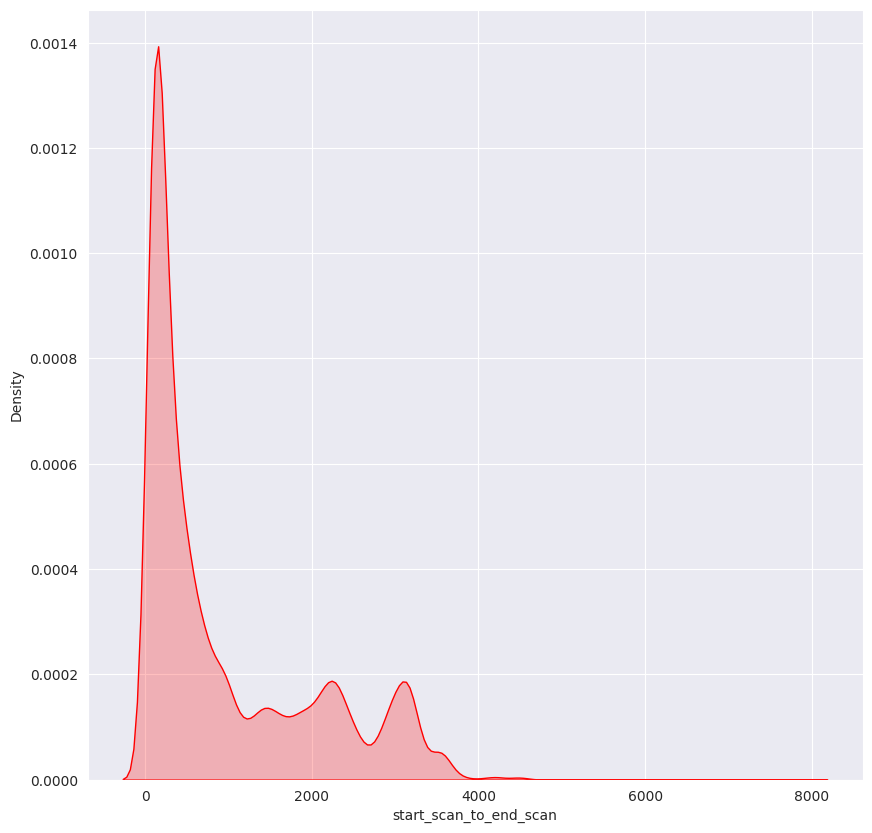

---------------------------------------------------------------------------
KDE Plot for columns actual_distance_to_destination
Skewness of actual_distance_to_destination: 1.9852173445904708
Kurtosis of actual_distance_to_destination: 3.3707756840385894


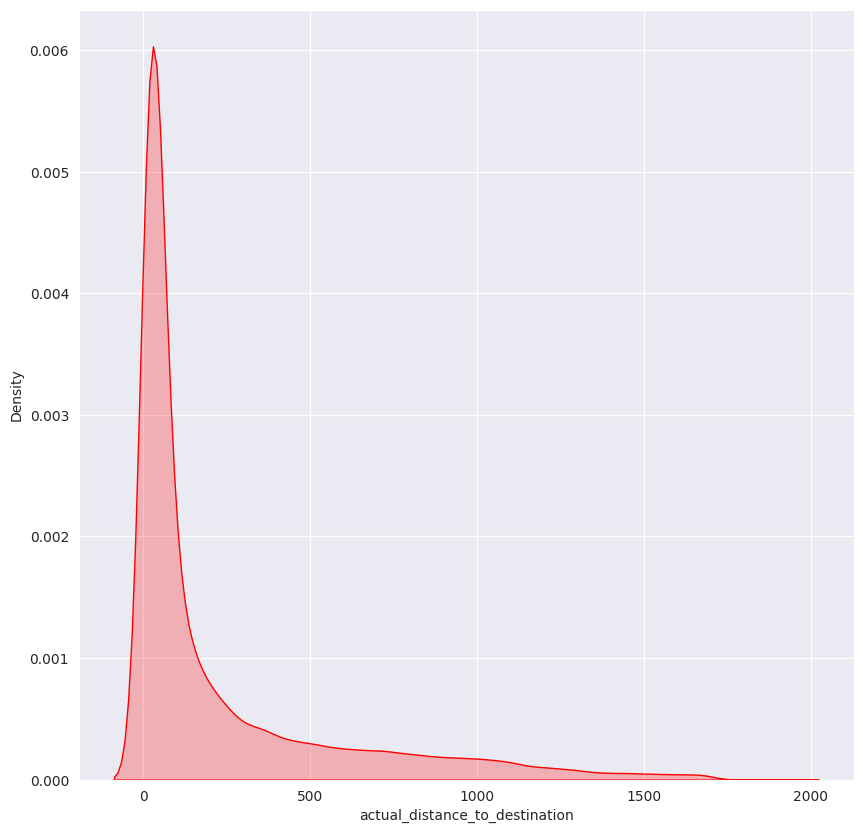

---------------------------------------------------------------------------
KDE Plot for columns actual_time
Skewness of actual_time: 2.062381665879303
Kurtosis of actual_time: 3.935344691462112


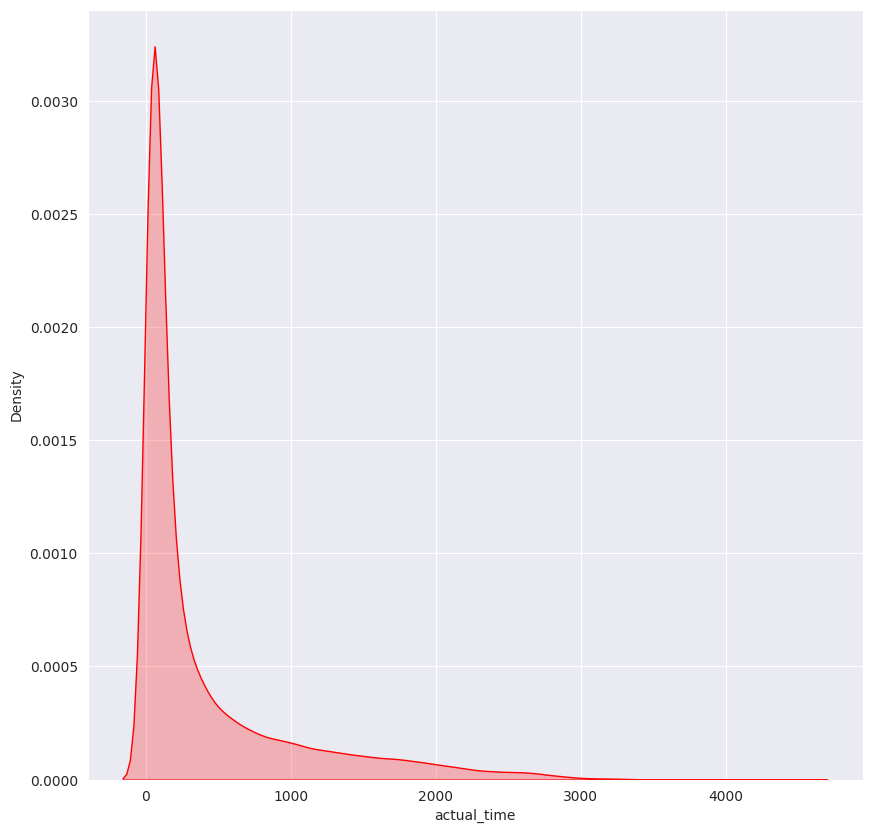

---------------------------------------------------------------------------
KDE Plot for columns osrm_time
Skewness of osrm_time: 2.039249755653416
Kurtosis of osrm_time: 3.7278397549788957


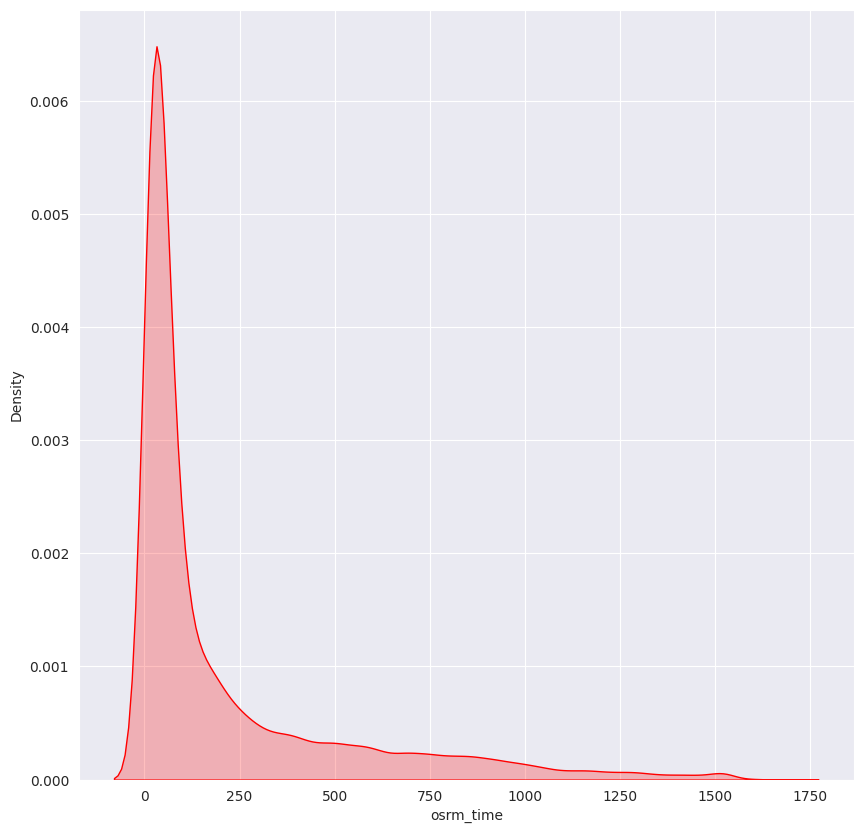

---------------------------------------------------------------------------
KDE Plot for columns osrm_distance
Skewness of osrm_distance: 2.0423020304144477
Kurtosis of osrm_distance: 3.706471439755326


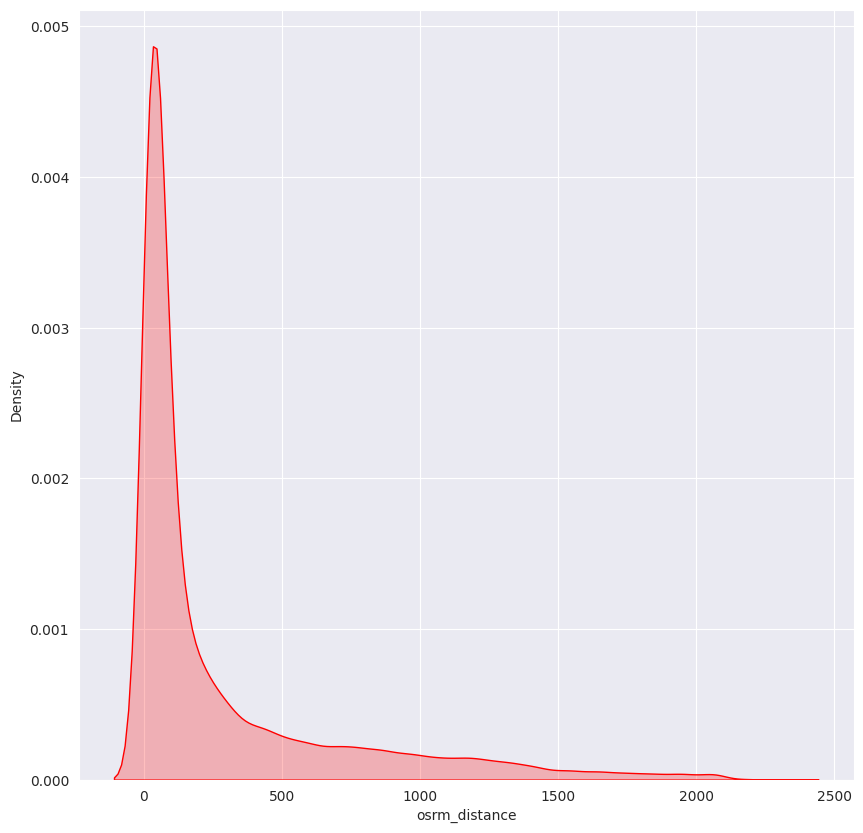

---------------------------------------------------------------------------
KDE Plot for columns segment_actual_time
Skewness of segment_actual_time: 16.820429085091064
Kurtosis of segment_actual_time: 495.2757914833815


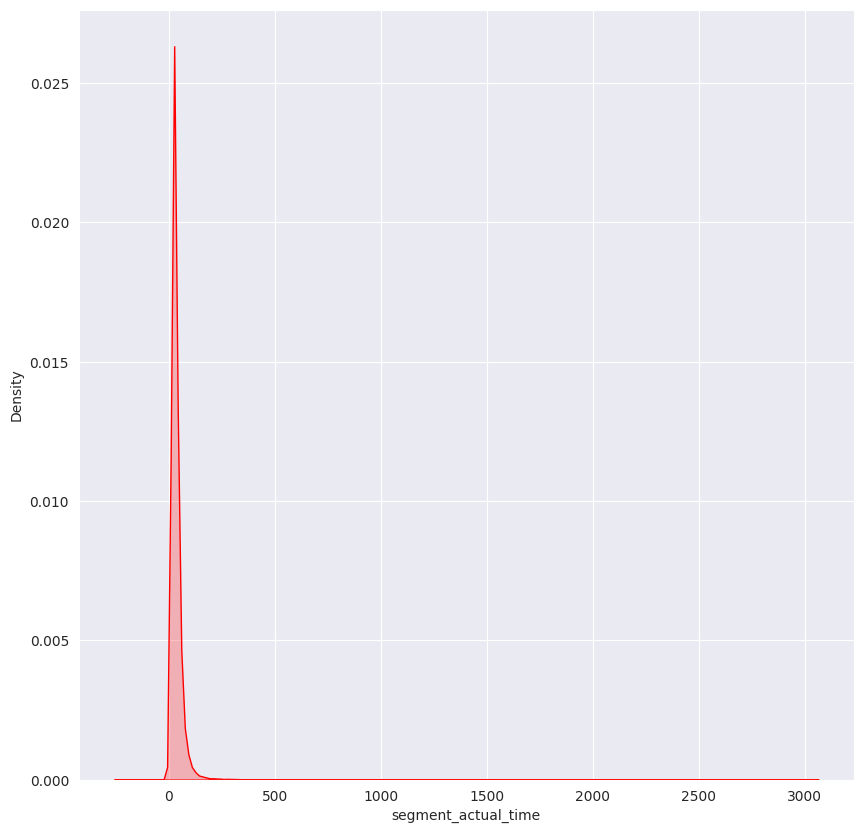

---------------------------------------------------------------------------
KDE Plot for columns segment_osrm_time
Skewness of segment_osrm_time: 19.70572743549669
Kurtosis of segment_osrm_time: 1450.7757107061298


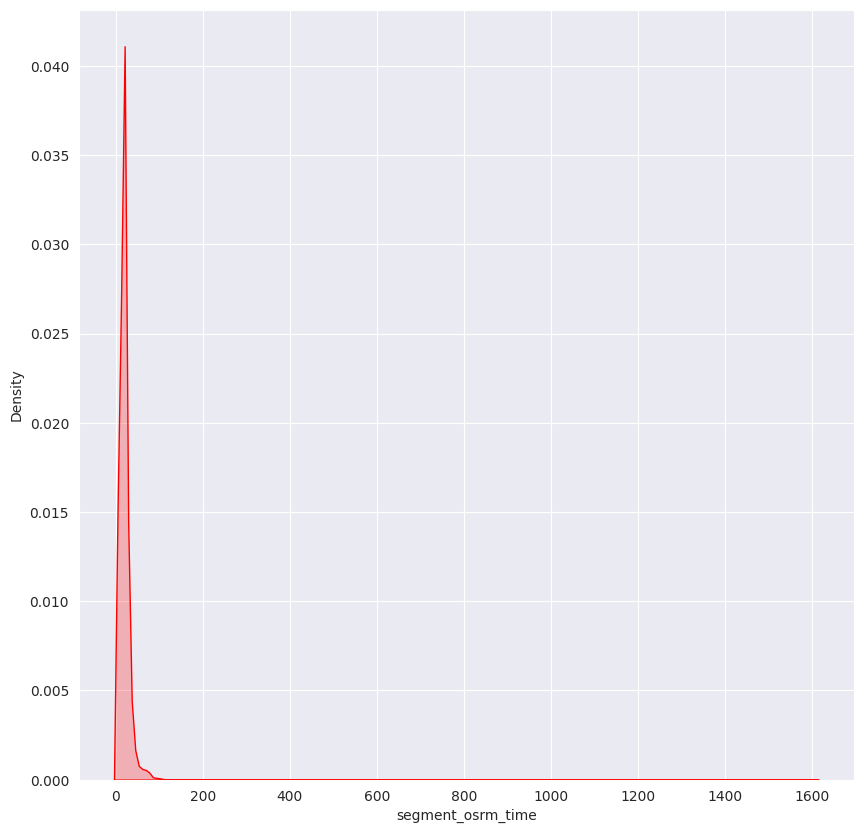

---------------------------------------------------------------------------
KDE Plot for columns segment_osrm_distance
Skewness of segment_osrm_distance: 26.64316287839868
Kurtosis of segment_osrm_distance: 2323.075351573814


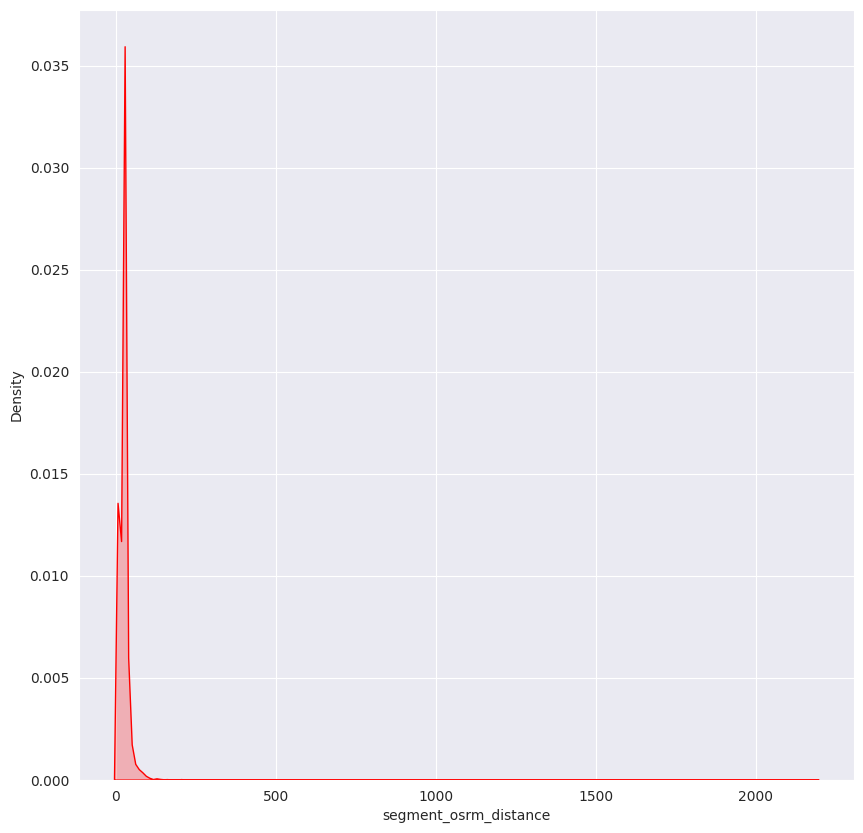

---------------------------------------------------------------------------


In [ ]:
for col in df.select_dtypes(include = np.number).columns:
 print(f"KDE Plot for columns {col}")
 print(f"Skewness of {col}: {df[col].skew()}")
 print(f"Kurtosis of {col}: {df[col].kurt()}")
 plt.figure(figsize = (10,10))
 sns.kdeplot(df[col] , color = "r", shade = True )
 plt.show()
 print("-------------------------"*3)

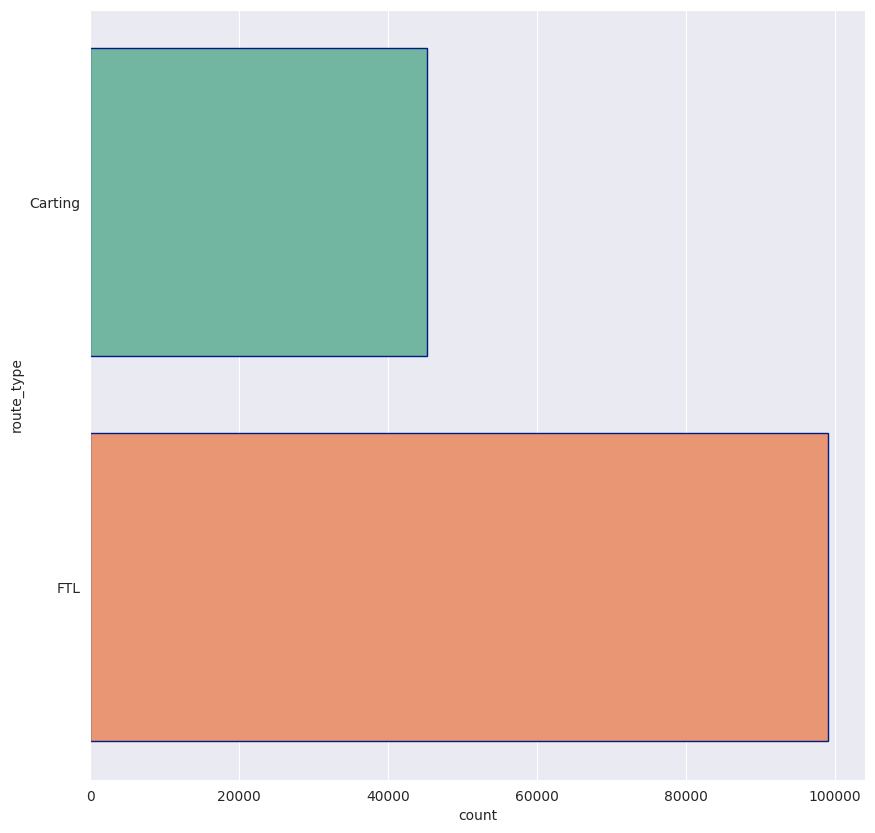

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(df['route_type'] ,edgecolor=sns.color_palette("dark", 3) , palette = "Set2" )
plt.show()

In [ ]:
df.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
#Converting Categorical Columns to Datetime where needed

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

# Feature Engineering and Aggregations

# Creating Unique Trip ID and Aggregation of Segment

In [ ]:
df['unique_trip_id'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
aggregate_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']


for column in aggregate_cols:
 df[column + '_sum'] = df.groupby('unique_trip_id')[column].cumsum()

df[[column + '_sum' for column in aggregate_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


In [ ]:
df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,unique_trip_id,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


In [ ]:
df['route_type'].value_counts(normalize = True)*100

,proportion
route_type,
FTL,68.690928
Carting,31.309072


In [ ]:
segment_dict = {
 'trip_creation_time' : 'first',
 'route_schedule_uuid' : 'first',
 'route_type' : 'first',

 'trip_uuid' : 'first',
 'source_center' : 'first',
 'source_name' : 'first',
 'destination_center' : 'last',
 'destination_name' : 'last',

 'od_start_time' : 'first',
 'od_end_time' : 'first',
 'start_scan_to_end_scan' : 'first',

 'actual_distance_to_destination' : 'last',
 'actual_time' : 'last',

 'osrm_time' : 'last',
 'osrm_distance' : 'last',

 'segment_actual_time_sum' : 'last',
 'segment_osrm_distance_sum' : 'last',
 'segment_osrm_time_sum' : 'last',

}
df2 = df.groupby('unique_trip_id').agg(segment_dict).reset_index()
df2 = df2.sort_values(by=['unique_trip_id','od_end_time'], ascending=True).reset_index(drop=True)

In [ ]:
df2.head()

,unique_trip_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [ ]:
# Create Od Time Difference Feature

df2['od_time_diff_hour'] = ((df2['od_end_time'] - df2['od_start_time']).dt.total_seconds()) / 60
df2['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


In [ ]:
trip_dict = {
 'trip_creation_time' : 'first',
 'route_schedule_uuid' : 'first',
 'route_type' : 'first',
 'trip_uuid' : 'first',

 'source_center' : 'first',
 'source_name' : 'first',

 'destination_center' : 'last',
 'destination_name' : 'last',

 'start_scan_to_end_scan' : 'sum',
 'od_time_diff_hour' : 'sum',

 'actual_distance_to_destination' : 'sum',
 'actual_time' : 'sum',
 'osrm_time' : 'sum',
 'osrm_distance' : 'sum',

 'segment_actual_time_sum' : 'sum',
 'segment_osrm_distance_sum' : 'sum',
 'segment_osrm_time_sum' : 'sum',

}
df3 = df2.groupby('trip_uuid').agg(trip_dict).reset_index(drop = True)
df3


,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [ ]:
#Convert Source and Destination Names to Lower String

df3['source_name'] = df3['source_name'].str.lower()
df3['destination_name'] = df3['destination_name'].str.lower() # lowering all columns

In [ ]:
df3['source_name'].apply(lambda x : x.split("(")[0]).unique()

#Checking

array(['kanpur_central_h_6 ', 'doddablpur_chikadpp_d ',
       'gurgaon_bilaspur_hb ', 'mumbai hub ', 'bellary_dc ',
       'chennai_poonamallee ', 'chennai_chrompet_dpc ', 'hbr layout pc ',
       'surat_central_d_12 ', 'delhi_lajpat_ip ', 'pune_north_d_3 ',
       'fbd_balabhgarh_dpc ', 'shirala_central_dpp_3 ',
       'hyderabad_shamshbd_h ', 'thirumalagiri_xroad_d ',
       'gulbarga_nehrugnj_i ', 'jaipur_central_i_7 ',
       'allahabad_central_h_1 ', 'delhi_nangli_ip ', 'guwahati_north ',
       'narsinghpur_kndlidpp_d ', 'surat_central_d_9 ',
       'shrirampur_davkharrd_d ', 'hoogly_bandel_d ',
       'madakasira_rtcstand_d ', 'sonari_central_dpp_1 ',
       'bengaluru_kgairprt_hb ', 'hyderabad_north_d_2 ',
       'dindigul_central_d_1 ', 'jalandhar_dc ', 'faridabad_mthurard_l ',
       'chandigarh_mullanpr_dc ', 'deoli_central_dpp_2 ',
       'pandharpur_rajcmplx_d ', 'ccu_beliaghata_dpc ',
       'bhandara_rjnaidpp_d ', 'kurnool_abbasngr_i ',
       'bhiwandi_mankoli_hb ', 'b

In [ ]:
df3['source_name'].apply(lambda x : x.split(" (")[0].split('_')[0]).unique()

#Checking

array(['kanpur', 'doddablpur', 'gurgaon', 'mumbai hub', 'bellary',
       'chennai', 'hbr layout pc', 'surat', 'delhi', 'pune', 'fbd',
       'shirala', 'hyderabad', 'thirumalagiri', 'gulbarga', 'jaipur',
       'allahabad', 'guwahati', 'narsinghpur', 'shrirampur', 'hoogly',
       'madakasira', 'sonari', 'bengaluru', 'dindigul', 'jalandhar',
       'faridabad', 'chandigarh', 'deoli', 'pandharpur', 'ccu',
       'bhandara', 'kurnool', 'bhiwandi', 'bhatinda', 'roopnagar',
       'bantwal', 'lalru', 'kadi', 'shahdol', 'gangakher', 'durgapur',
       'vapi', 'jamjodhpur', 'jetpur', 'mehsana', 'jabalpur', 'junagadh',
       'gundlupet', 'mysore', 'goa', 'bhopal', 'sonipat', 'himmatnagar',
       'jamshedpur', 'pondicherry', 'maa', 'anand', 'udgir', 'nadiad',
       'villupuram', 'purulia', 'bhopal mp nagar', 'bhubaneshwar',
       'bamangola', 'mumbai', 'tiruppattur', 'kotdwara', 'medak',
       'bangalore', 'dhrangadhra', 'hospet', 'ghumarwin', 'chandroknard',
       'agra', 'sitapur', 'c

In [ ]:
def getstate(string):
 # extract state from "gurgaon_bilaspur_hb (haryana)" into "haryana"
 state = string.split('(')[1][:-1]
 return state
def getcity(string):
 #Removing state
 city = string.split(' (')[0].split('_')[0]


 # We have some unaccounted cases

 if city == 'pnq vadgaon sheri dpc':
  return 'vadgaonsheri'
 # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
 # 'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']
 if city == 'hbr layout pc' :
  return 'bengaluru'

 if city == 'bhopal mp nagar':
  return 'bhopal'

 if city == 'mumbai antop hill' or city == "mumbai hub":
  return 'mumbai'
 if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
  return 'pune'

 return city
def get_city_place(string):
  # we will remove state
 string = string.split('(')[0]
 len_ = len(string.split('_'))
 if len_ >= 3:
  return string.split('_')[1]
 # small cities have same city and place name
 if len_ == 2:
  return string.split('_')[0]
 return string.split(' ')[0]

def getcode(string):
 # we will remove state
 string = string.split('(')[0]
 if len(string.split('_')) >= 3:
  return string.split('_')[-1]
 return 'none'


In [ ]:
df3['source_state'] = df3['source_name'].apply(lambda x: getstate(x))
df3['source_city'] = df3['source_name'].apply(lambda x: getcity(x))
df3['source_place'] = df3['source_name'].apply(lambda x: get_city_place(x))
df3['source_code'] = df3['source_name'].apply(lambda x: getcode(x))
df3['destination_state'] = df3['destination_name'].apply(lambda x: getstate(x))
df3['destination_city'] = df3['destination_name'].apply(lambda x: getcity(x))
df3['destination_place'] = df3['destination_name'].apply(lambda x: get_city_place(x))
df3['destination_code'] = df3['destination_name'].apply(lambda x: getcode(x))

In [ ]:
df3['source_city'].apply(lambda x : len(x.split(" "))>1).value_counts()

,count
source_city,
False,14778
True,9


In [ ]:
df3['source_city'] = df3['source_city'].apply(lambda x : x if len(x.split(" ")) ==1 else x.split(" ")[1])
df3['destination_city'] = df3['destination_city'].apply(lambda x : x if len(x.split(" ")) ==1 else x.split(" ")[1])

#Handling all Edge Cases using Ternary Operator

In [ ]:
df3[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


In [ ]:
df3['trip_creation_time'] = pd.to_datetime(df3['trip_creation_time'])
df3['trip_year'] = df3['trip_creation_time'].dt.year
df3['trip_month'] = df3['trip_creation_time'].dt.month
df3['trip_hour'] = df3['trip_creation_time'].dt.hour
df3['trip_day'] = df3['trip_creation_time'].dt.day
df3['trip_week'] = df3['trip_creation_time'].dt.isocalendar().week
df3['trip_dayofweek'] = df3['trip_creation_time'].dt.dayofweek
df3[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [ ]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
 'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
 'segment_osrm_time_sum', 'od_time_diff_hour']

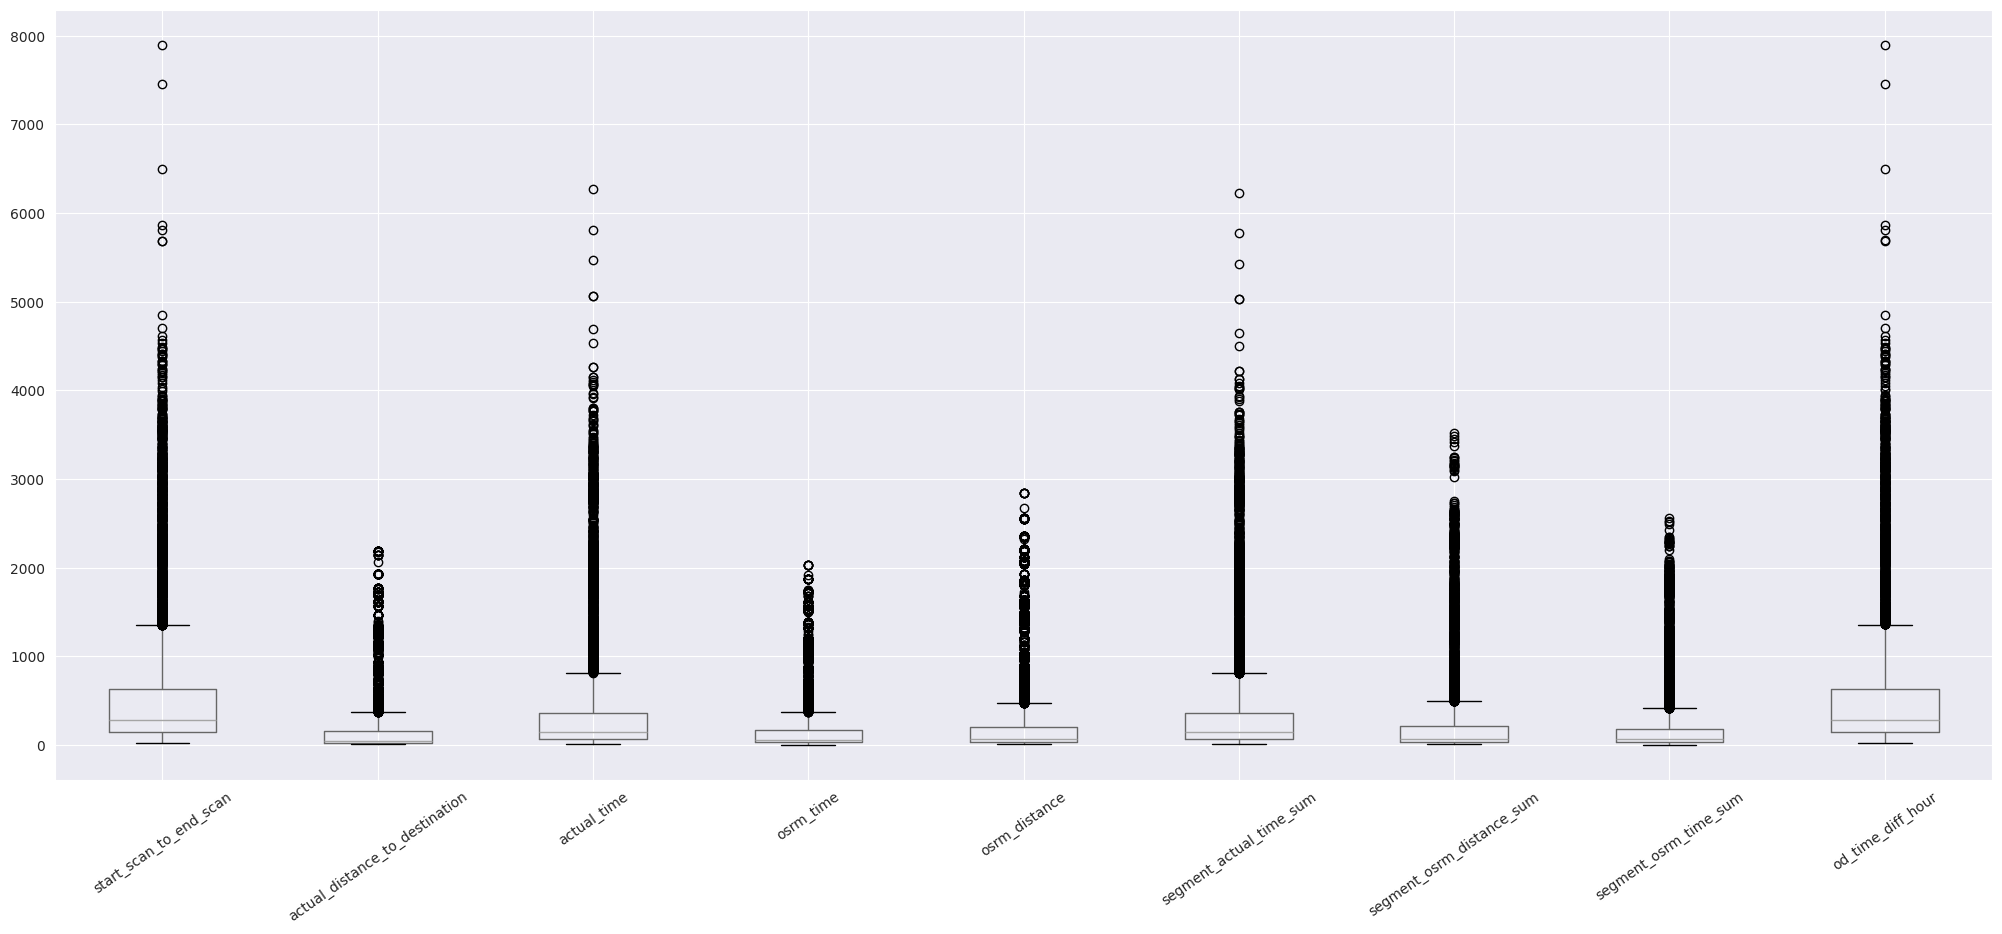

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")
df3[num_cols].boxplot(figsize=(25,10) , rot = 35)
plt.show()

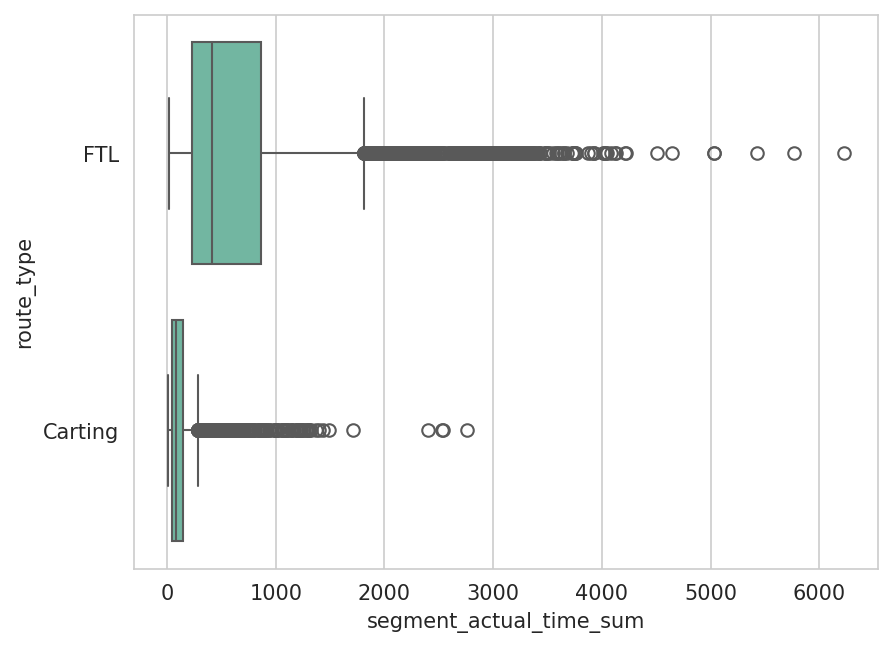

In [ ]:
sns.set_style("whitegrid")
plt.figure(dpi = 150)
sns.boxplot(data = df3 , x = "segment_actual_time_sum" , y= "route_type")
plt.show()

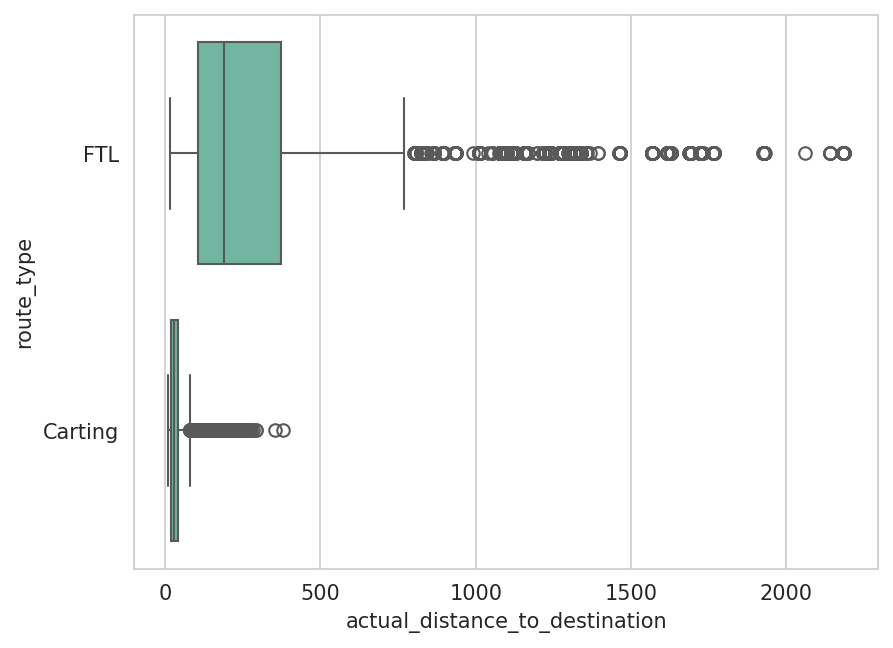

In [ ]:
sns.set_style("whitegrid")
plt.figure(dpi = 150)
sns.boxplot(data = df3 , x = "actual_distance_to_destination" , y= "route_type")
plt.show()

#Full Truck Loads Upper Bound is less than 500 km whereas for Carting it is less than 150 Km

# Removing Outliers via IQR Method

In [ ]:
q1 = df3[num_cols].quantile(0.25)
q3 = df3[num_cols].quantile(0.75)
iqr = q3 - q1
df3 = df3[-((df3[num_cols] < (q1 - 1.5 * iqr)) | (df3[num_cols] > (q3 + 1.5 * iqr))).any(axis=1)]
df3 = df3.reset_index(drop=True)
df3

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2
3,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,190.487849,...,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,98.005634,...,tamil nadu,chennai,vandalur,dc,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,258.028928,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
12719,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,60.590521,...,haryana,faridabad,blbgarh,dc,2018,10,23,3,40,2
12720,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,422.119867,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
12721,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,348.512862,...,tamil nadu,tirchchndr,shnmgprm,d,2018,10,23,3,40,2


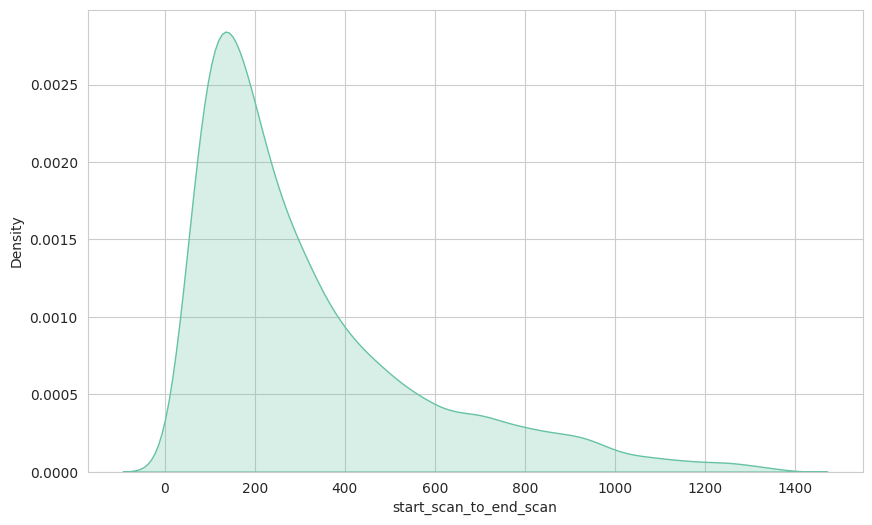

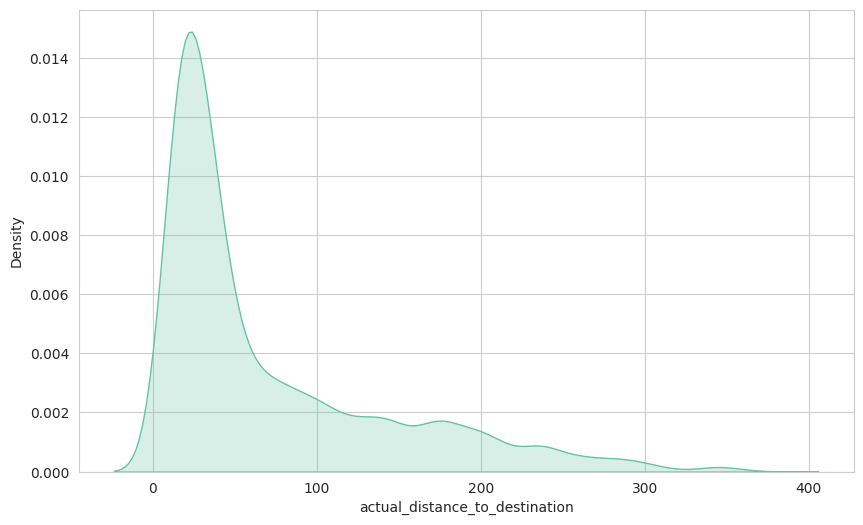

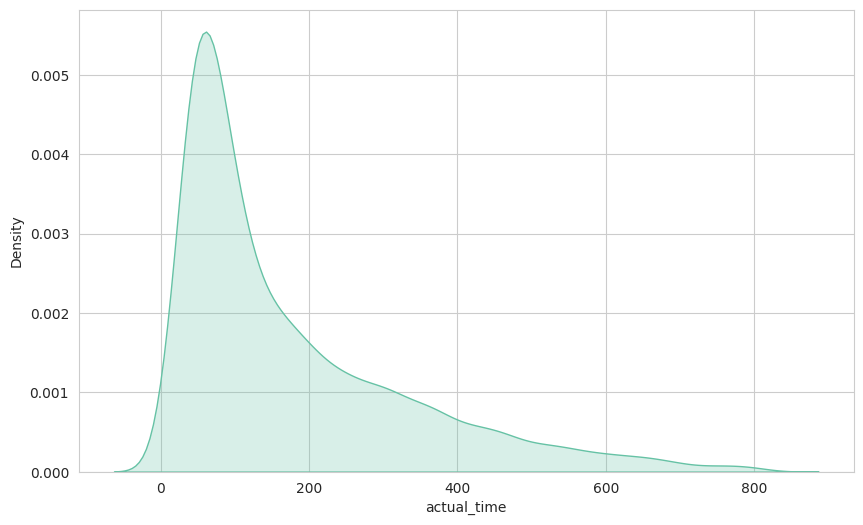

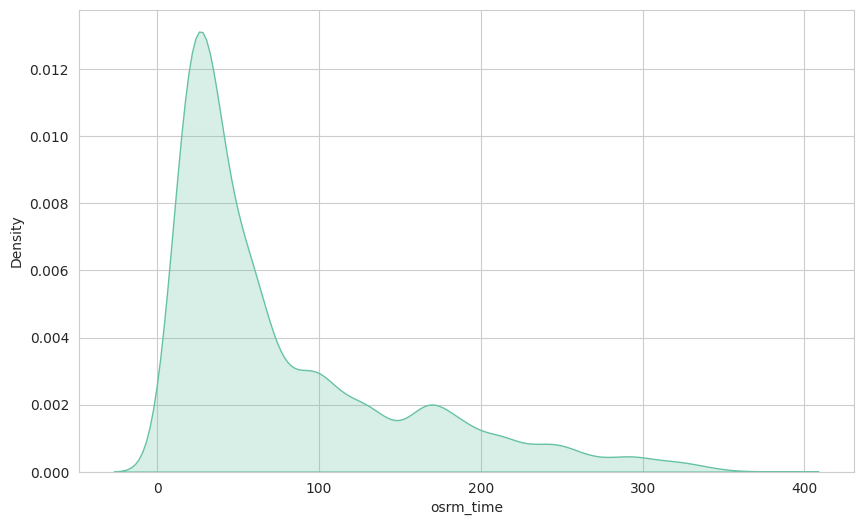

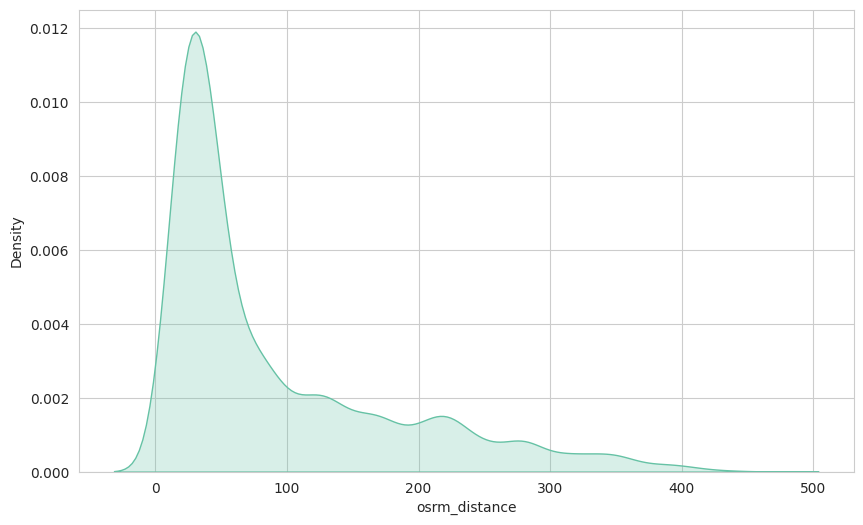

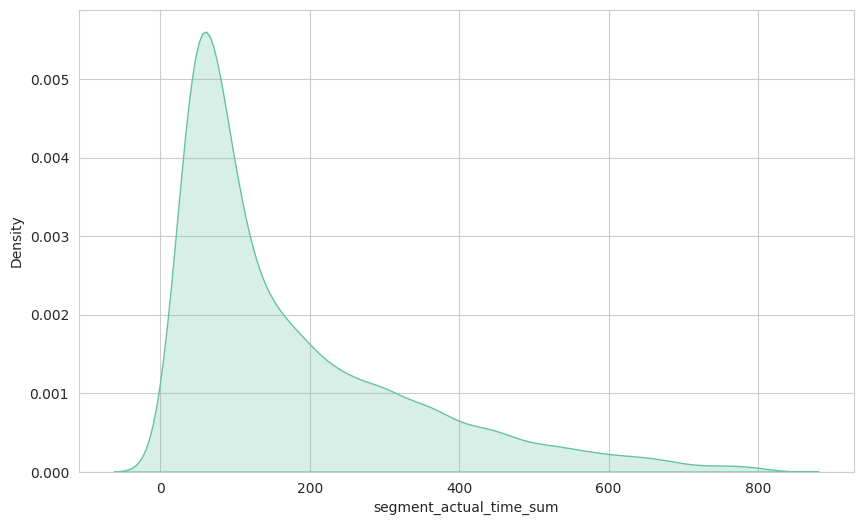

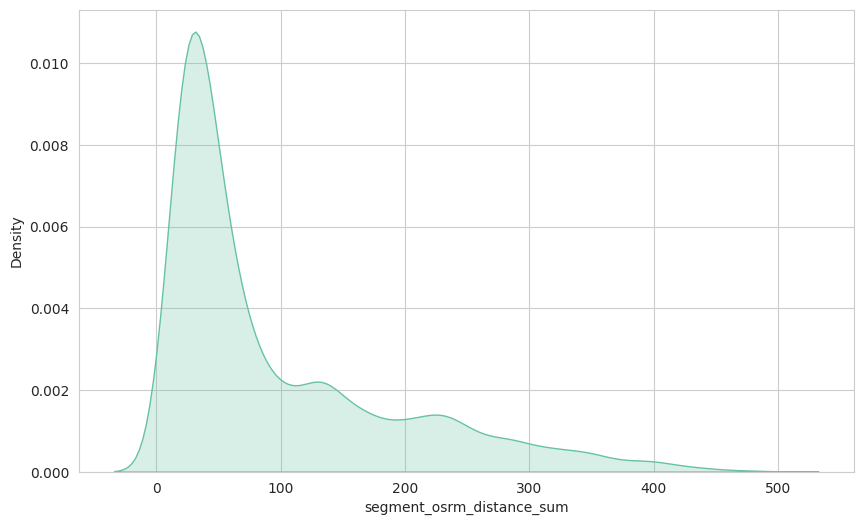

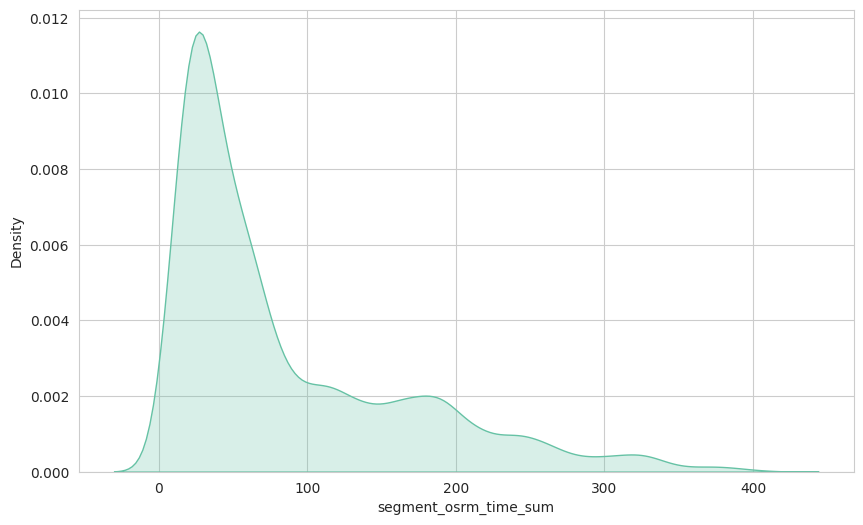

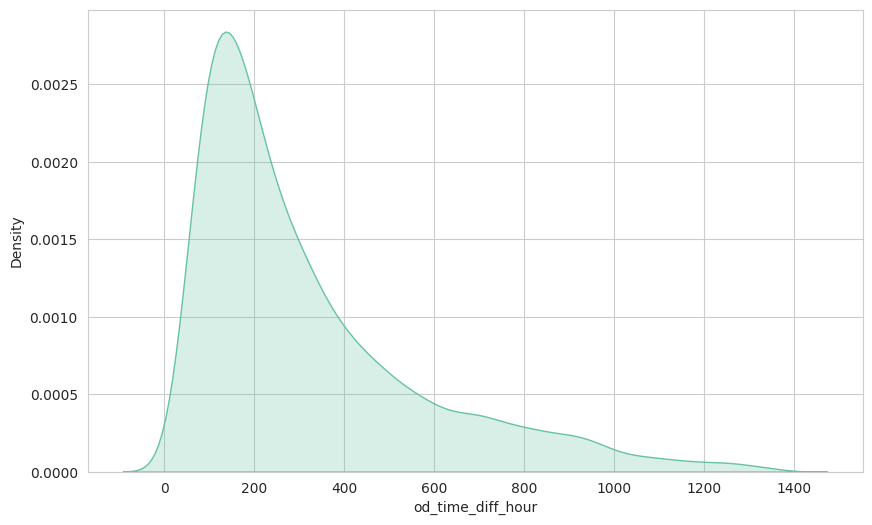

In [ ]:
for col in df3[num_cols].columns:
 plt.figure(figsize = (10,6))
 sns.kdeplot(df3[col] , palette= sns.color_palette("dark",3) , shade = True)
 plt.show()

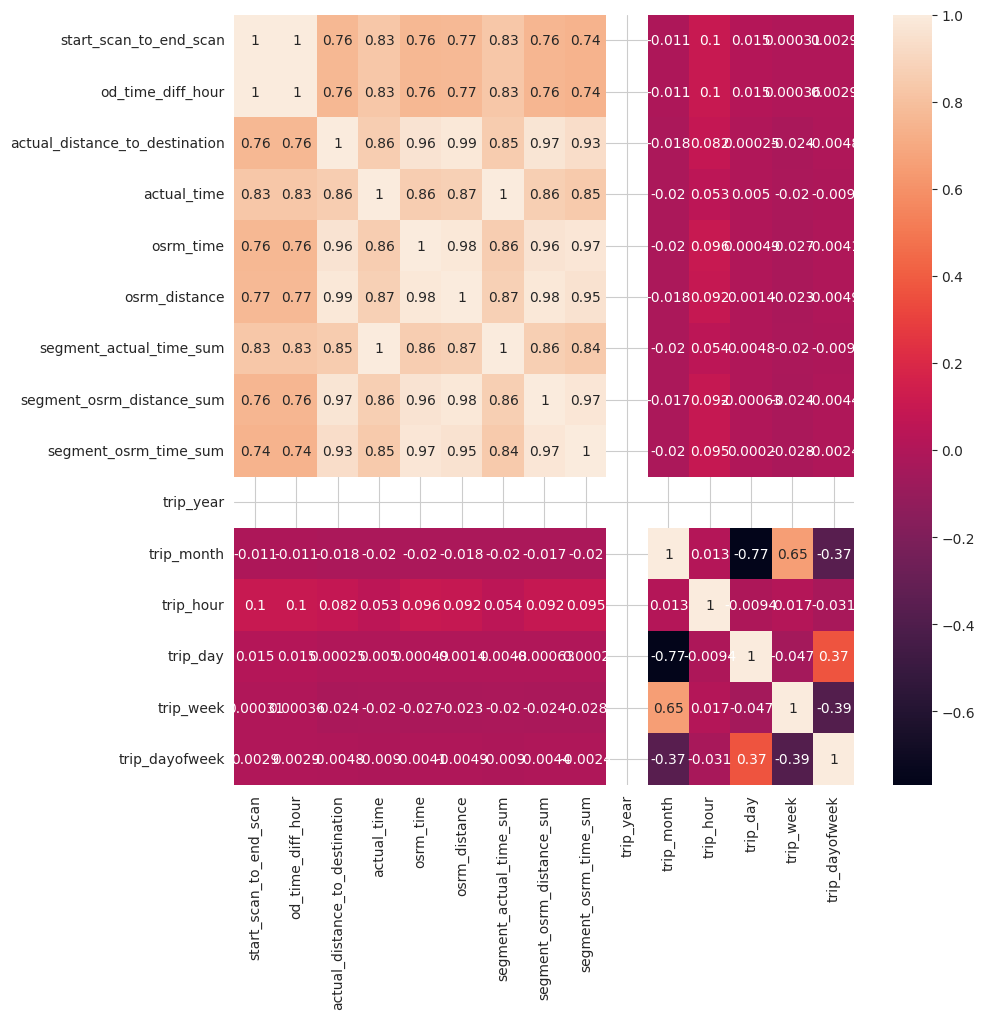

In [ ]:
plt.figure(figsize=(10, 10))
numeric_df = df3.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, annot_kws={'size': 10})
plt.show()

# Hypothesis testing

In [ ]:
#H0 - No Difference in means
#H1 There is a difference in menas
#Significance = 5%

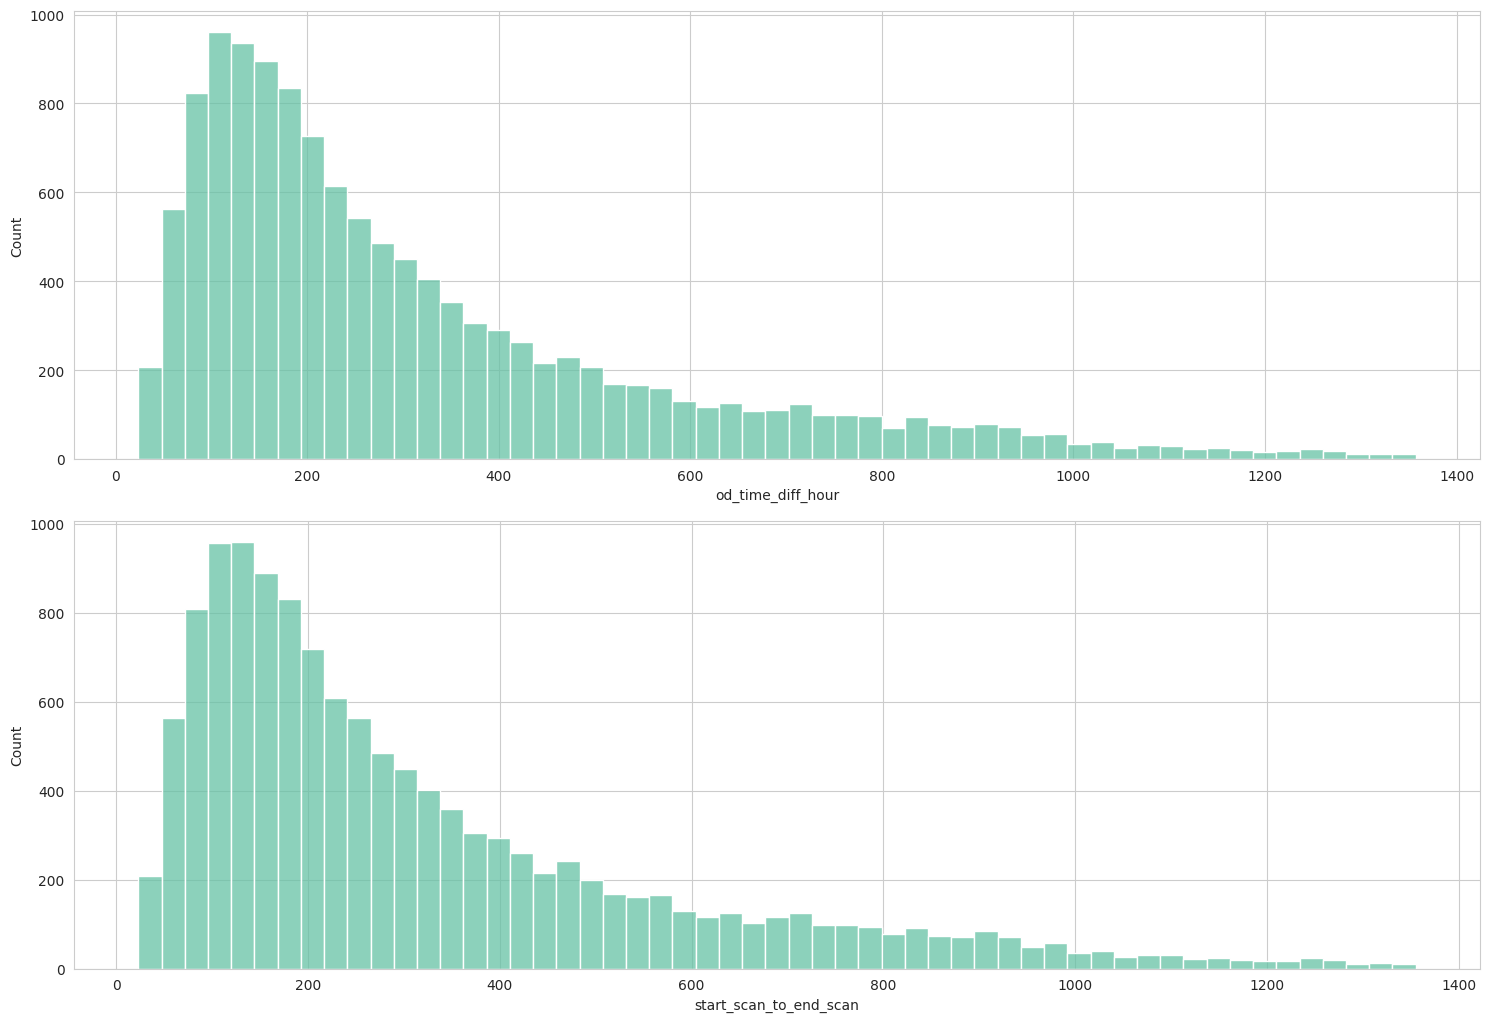

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.histplot(data = df3['od_time_diff_hour'])
plt.subplot(3,1,2)
sns.histplot(data = df3['start_scan_to_end_scan'])
plt.tight_layout()
plt.show()

# We must check for assumptions

# Independent Random Samples
# Normally Distributed
# Equal Variances

In [ ]:
#Shapiro Test for Normality
#H0 - Data Follows a normal Distribution
#H1 - Data does not follow a normal distribution
od = np.random.choice(df3['od_time_diff_hour'] , size = 3500 )
start_end = np.random.choice(df3['start_scan_to_end_scan'] , size = 3500)
test , pval = shapiro(od)
print(f"OD Pvalue {pval}")
test , pval = shapiro(start_end)
print(f"start_scan_to_end_scan Pvalue {pval}")
#Data does not follow a normal distribution as pvalue is less than 0.05

OD Pvalue 6.021689761797049e-51
start_scan_to_end_scan Pvalue 9.675085027862683e-51


In [ ]:
#Levene Tests for Equal Variances
#H0 - No Difference (Equal Varainces)
#H1 - Difference in Variance
test,pval = levene(od , start_end)
if pval>0.05:
 print("Failed to Reject H0 - Samples have equal variances ")
else:
 print("Reject H0 - Samples have different variances ")

Failed to Reject H0 - Samples have equal variances 


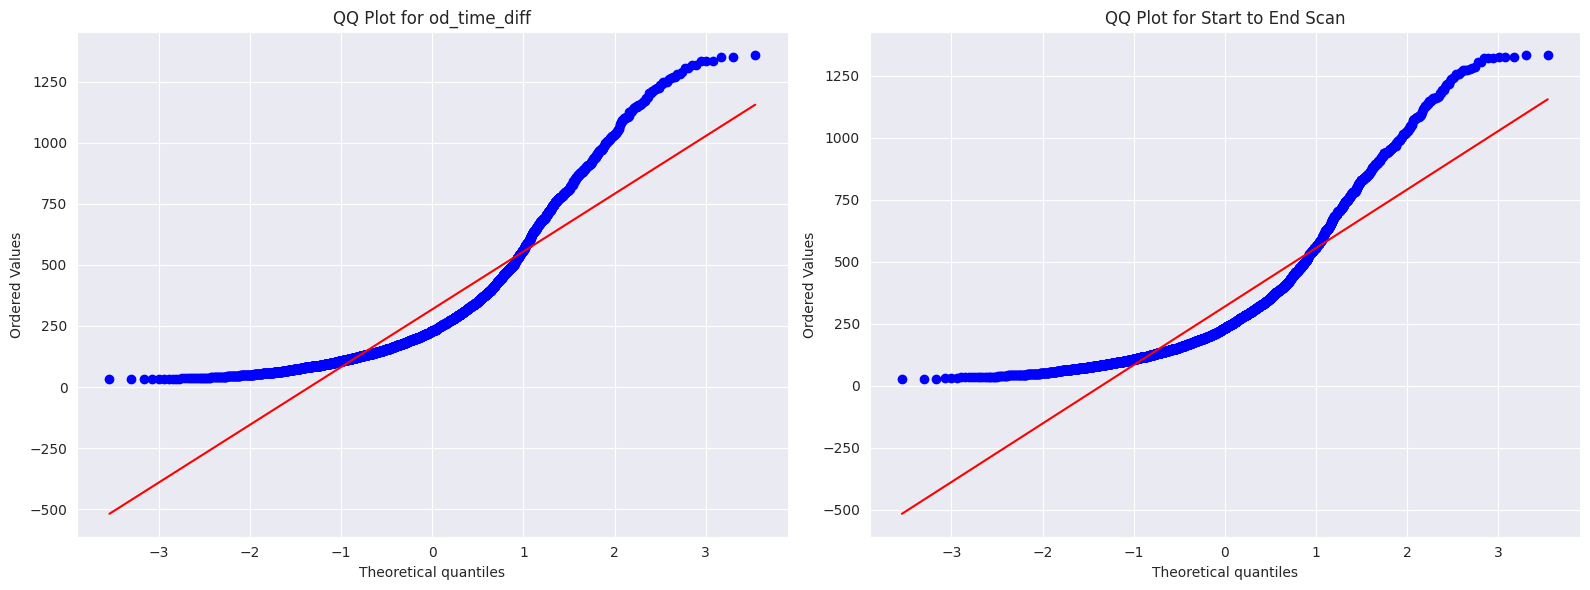

In [ ]:
# QQPlot to determine if data follows similar distribution
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
probplot(od , plot = plt , dist = "norm")
plt.title("QQ Plot for od_time_diff")
plt.subplot(1,2,2)
probplot(start_end , plot = plt , dist = "norm")
plt.title("QQ Plot for Start to End Scan")
plt.tight_layout()
plt.show()
#Data Does not follow Normal Distribution

In [ ]:
#Performing Kruskal Test as data is not normal but variances are equal
#H0 - No Difference in means of samples
#H1 - Difference in means of samples
test , pval = kruskal(od , start_end)
print(pval > 0.05)
print(pval)
# As Pvalue is >0.05 we fail to reject H0 - means of two samples are equal

True
0.6705184346735966


In [ ]:
#Quickly also use a ttest
print(ttest_ind(od , start_end)[1]>0.05)
print("Pvalue: ",ttest_ind(od , start_end)[1])
#High Value with Ttest also states that there is no difference in the means of two samples

True
Pvalue:  0.8069606298410017


# 2. Actual and OSRM Time

In [ ]:
#H0 - No Difference in means
#H1 There is a difference in menas
#Significance = 5%

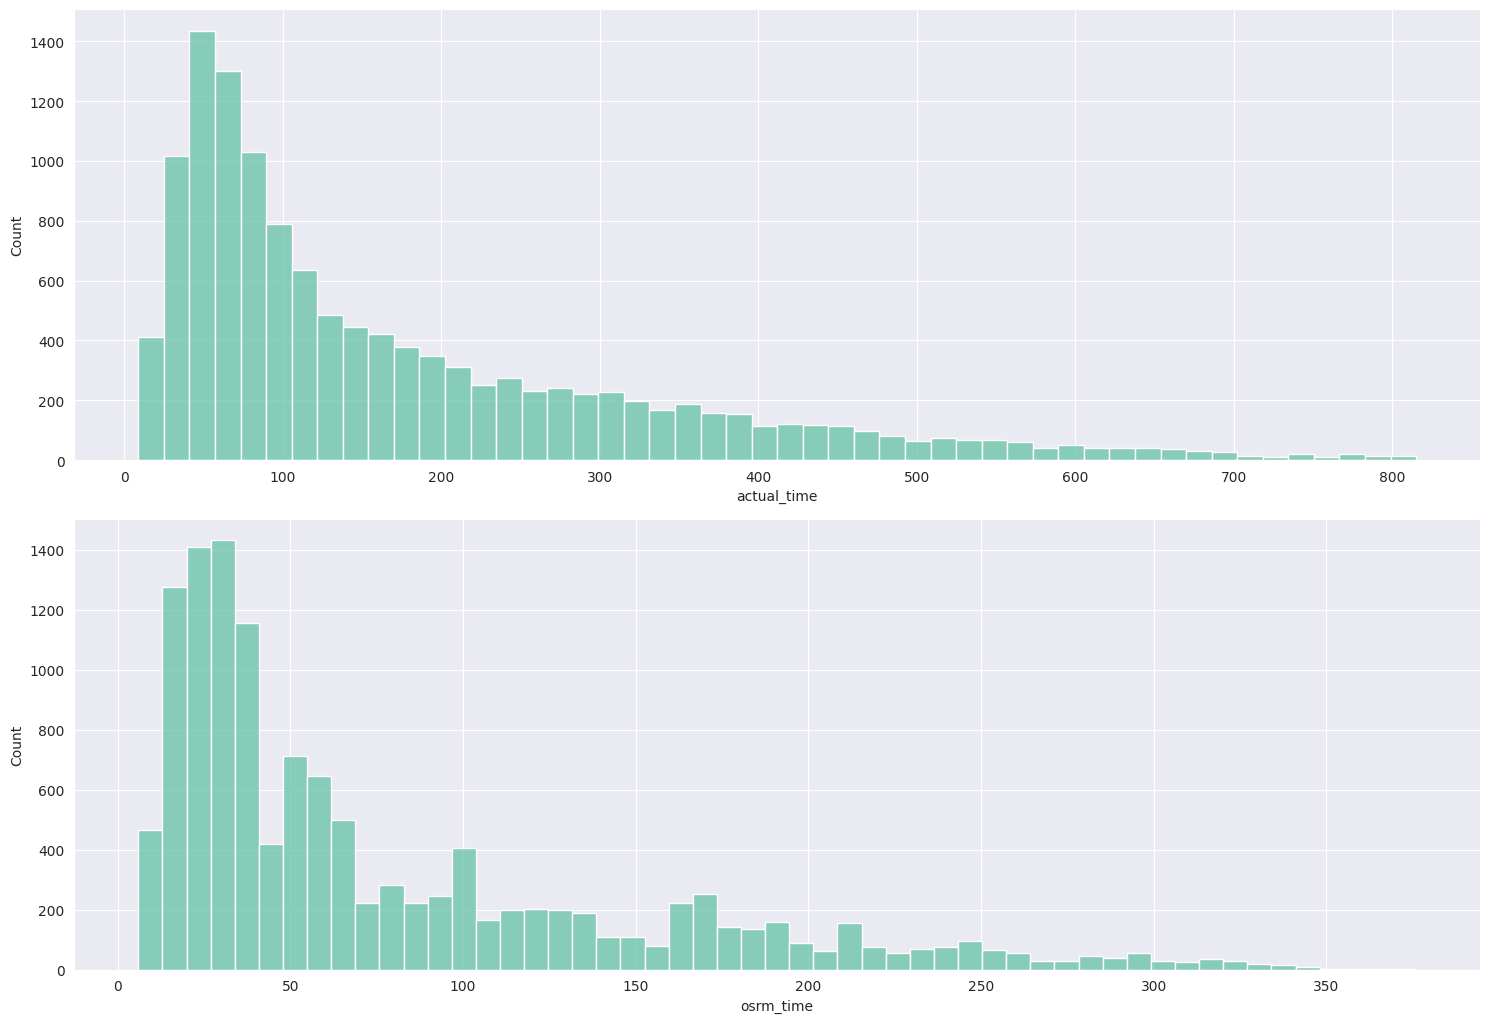

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.histplot(data = df3['actual_time'])
plt.subplot(3,1,2)
sns.histplot(data = df3['osrm_time'])
plt.tight_layout()
plt.show()

# We must check for assumptions

# Independent Random Samples
# Normally Distributed
# Equal Variances

In [ ]:
#Shapiro Test for Normality
#H0 - Data Follows a normal Distribution
#H1 - Data does not follow a normal distribution
actual = np.random.choice(df3['actual_time'] , size = 3500 )
osrm = np.random.choice(df3['osrm_time'] , size = 3500)
test , pval = shapiro(actual)
print(f"Actual Time Pvalue {pval}")
test , pval = shapiro(osrm)
print(f"OSRM Time Pvalue {pval}")
#Data does not follow a normal distribution as pvalue is less than 0.05

Actual Time Pvalue 1.6382545641923853e-50
OSRM Time Pvalue 2.8136764630120987e-52


In [ ]:
#Levene Tests for Equal Variances
#H0 - No Difference (Equal Varainces)
#H1 - Difference in Variance
test,pval = levene(actual , osrm)
if pval>0.05:
 print("Failed to Reject H0 - Samples have equal variances ")
else:
 print("Reject H0 - Samples have different variances ")

Reject H0 - Samples have different variances 


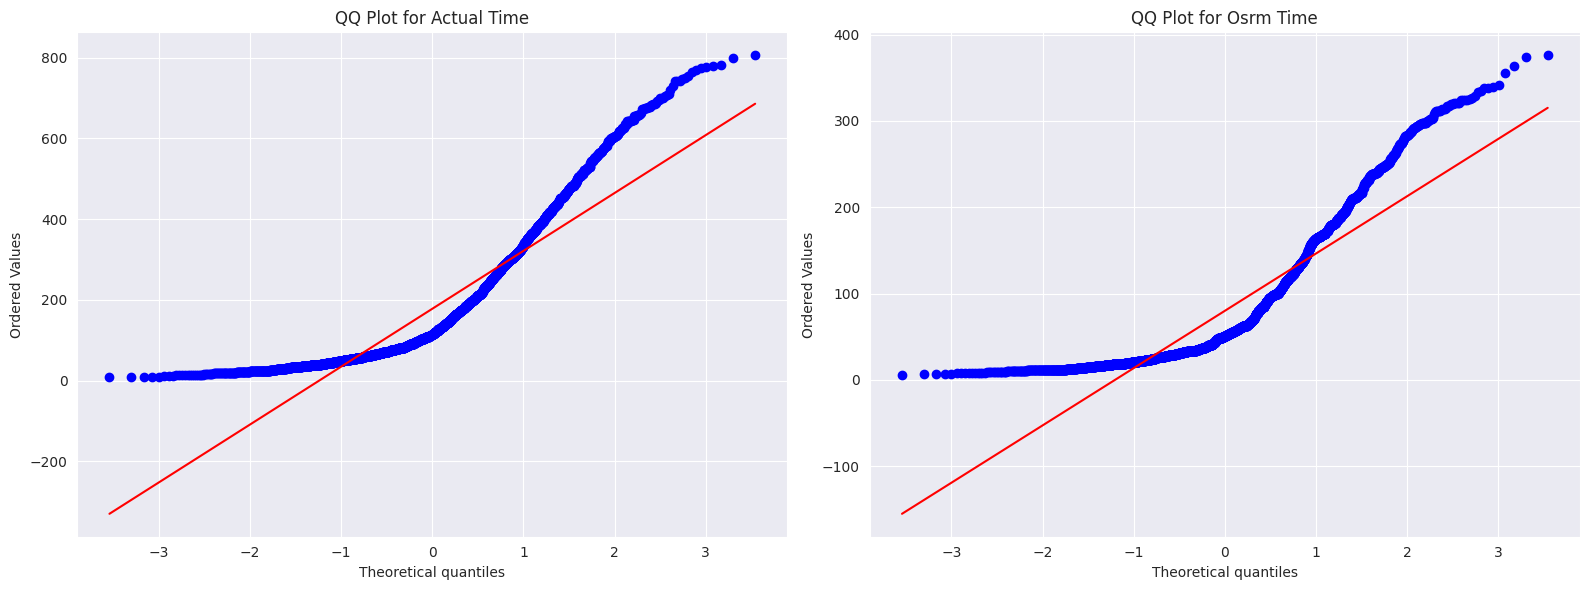

In [ ]:
# QQPlot to determine if data follows similar distribution
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
probplot(actual , plot = plt , dist = "norm")
plt.title("QQ Plot for Actual Time")
plt.subplot(1,2,2)
probplot(osrm , plot = plt , dist = "norm")
plt.title("QQ Plot for Osrm Time")
plt.tight_layout()
plt.show()
#Data Does not follow Normal Distribution

In [ ]:
#Performing Kruskal Test as data is not normal but variances are equal
#H0 - No Difference in means of samples
#H1 - Difference in means of samples
test , pval = kruskal(actual , osrm)
print(pval > 0.05)
print(pval)
# As Pvalue is < 0.05 we reject H0 - means of two samples are different

False
1.1452247740064995e-251


In [ ]:
#Quickly also use a ttest
print(ttest_ind(actual , osrm)[1]>0.05)
print("Pvalue: ",ttest_ind(actual , osrm)[1])
#Low Value with Ttest also states that there is a difference in the means of two samples

False
Pvalue:  3.186229880729424e-230


# 3. Actual Time Aggregated Value / Segment Time Aggregated Value

In [ ]:
#H0 - No Difference in means
#H1 There is a difference in menas
#Significance = 5%

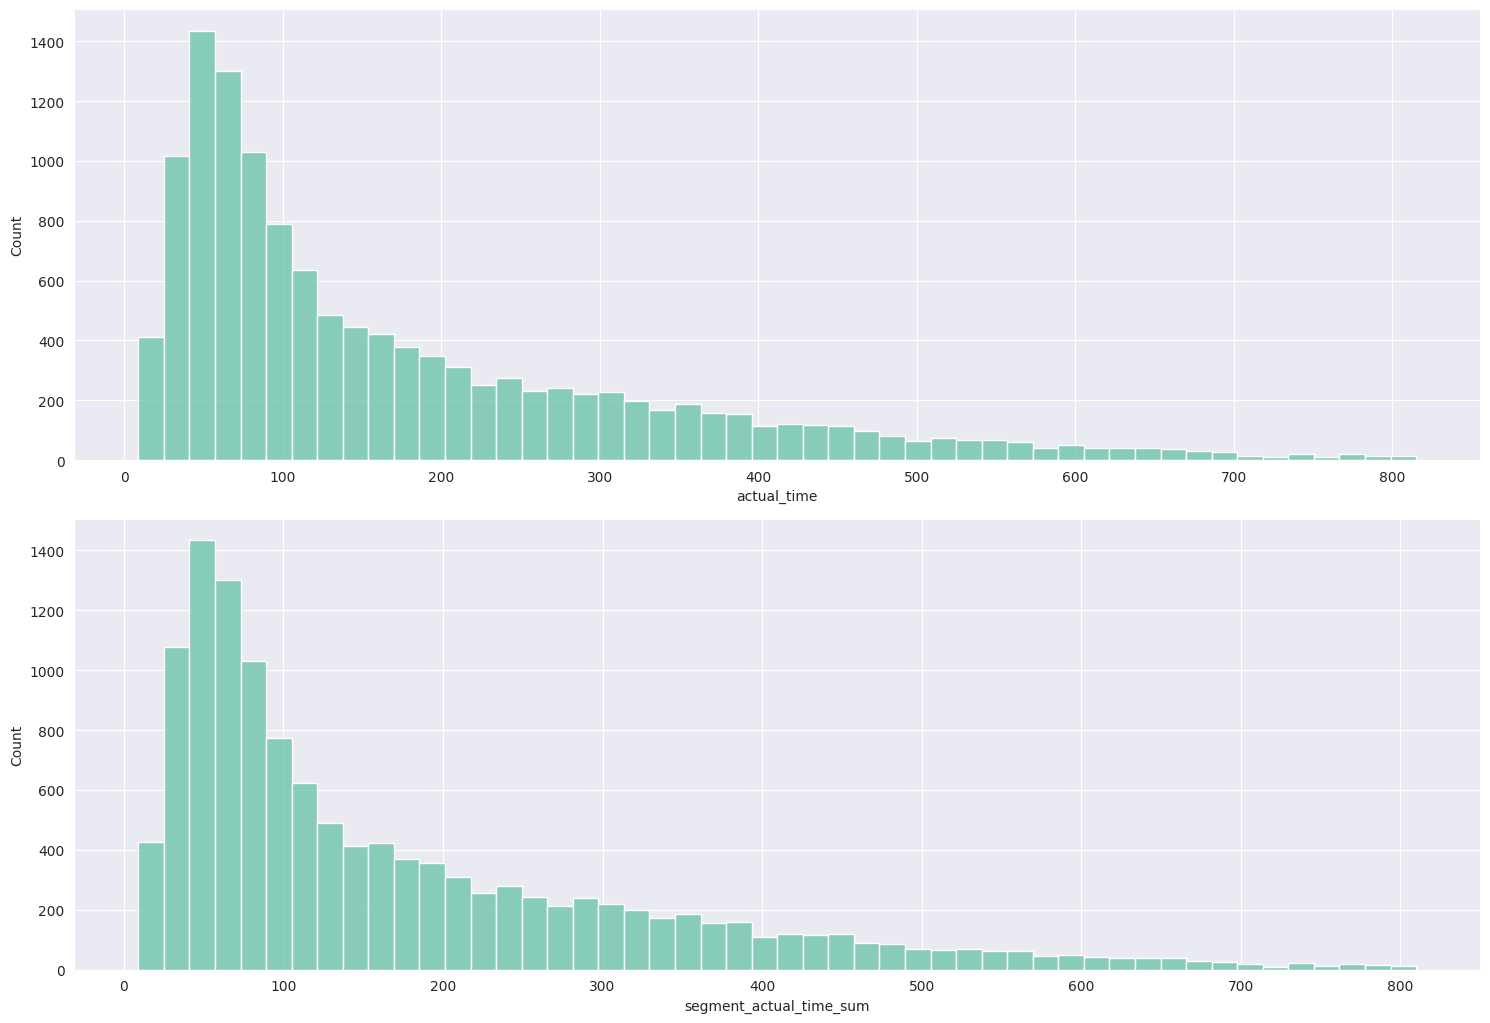

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.histplot(data = df3['actual_time'])
plt.subplot(3,1,2)
sns.histplot(data = df3['segment_actual_time_sum'])
plt.tight_layout()
plt.show()

# We must check for assumptions

# Independent Random Samples
# Normally Distributed
# Equal Variances

In [ ]:
#Shapiro Test for Normality
#H0 - Data Follows a normal Distribution
#H1 - Data does not follow a normal distribution
actual = np.random.choice(df3['actual_time'] , size = 3500 )
segment = np.random.choice(df3['segment_actual_time_sum'] , size = 3500)
test , pval = shapiro(actual)
print(f"Actual Time Pvalue {pval}")
test , pval = shapiro(segment)
print(f"Segment Actual Time Pvalue {pval}")
#Data does not follow a normal distribution as pvalue is less than 0.05

Actual Time Pvalue 1.665801673701033e-51
Segment Actual Time Pvalue 5.970444424815859e-51


In [ ]:
#Levene Tests for Equal Variances
#H0 - No Difference (Equal Varainces)
#H1 - Difference in Variance
test,pval = levene(actual , segment)
if pval>0.05:
 print("Failed to Reject H0 - Samples have equal variances ")
else:
 print("Reject H0 - Samples have different variances ")

Failed to Reject H0 - Samples have equal variances 


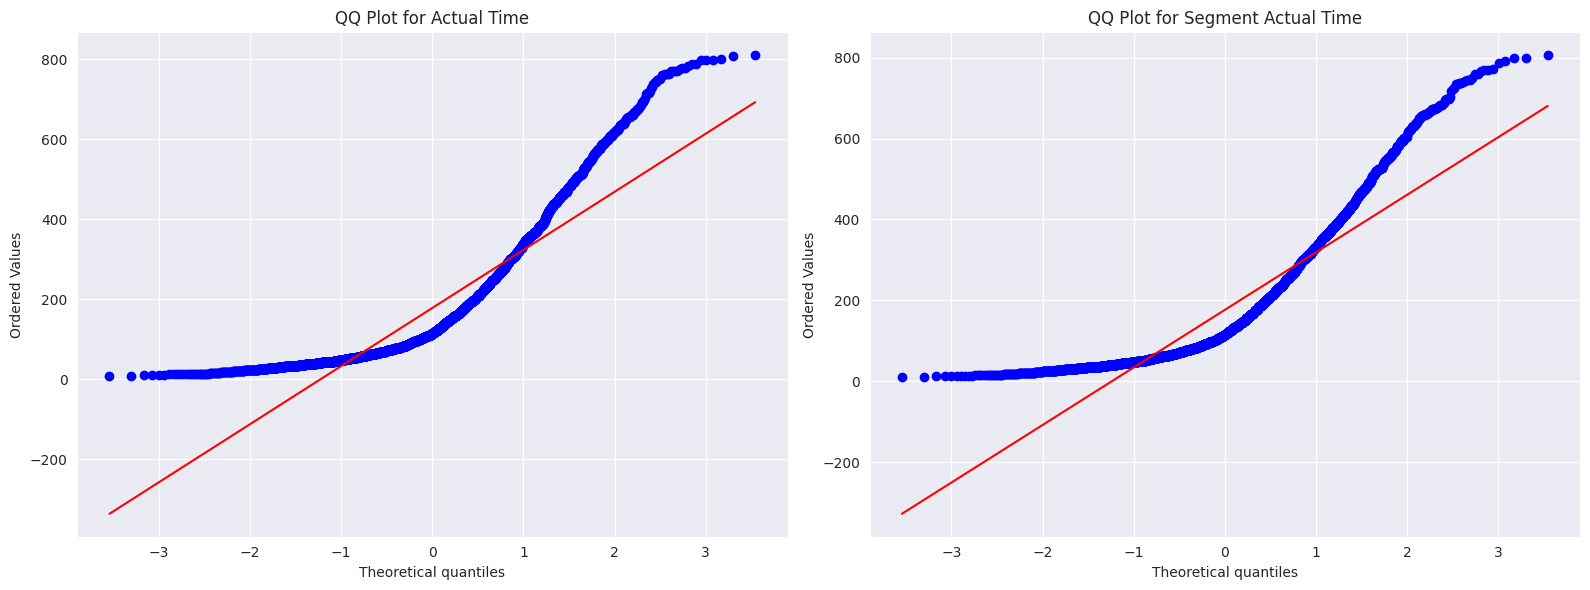

In [ ]:
# QQPlot to determine if data follows similar distribution
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
probplot(actual , plot = plt , dist = "norm")
plt.title("QQ Plot for Actual Time")
plt.subplot(1,2,2)
probplot(segment , plot = plt , dist = "norm")
plt.title("QQ Plot for Segment Actual Time")
plt.tight_layout()
plt.show()
#Data Does not follow Normal Distribution

In [ ]:
#Performing Kruskal Test as data is not normal but variances are equal
#H0 - No Difference in means of samples
#H1 - Difference in means of samples
test , pval = kruskal(actual , segment)
print(pval > 0.05)
print(pval)
# As Pvalue is > 0.05 we fail to reject H0 - means of two samples are same

True
0.8067896294931806


In [ ]:
#Quickly also use a ttest
print(ttest_ind(actual , segment)[1]>0.05)
print("Pvalue: ",ttest_ind(actual , segment)[1])
# PValue >0.05 with Ttest also states that there is no difference in the means of two samples

True
Pvalue:  0.6037227952733206


# One Hot Encode Columns

In [ ]:
df3 = pd.get_dummies(df3 , columns= ['route_type'])
df3

,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,...,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,route_type_Carting,route_type_FTL
0,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,...,chikadpp,d,2018,9,0,12,37,2,True,False
1,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,...,mirard,ip,2018,9,0,12,37,2,True,False
2,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,...,wrdn1dpp,d,2018,9,0,12,37,2,False,True
3,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,190.487849,24.597048,...,chennai,none,2018,9,0,12,37,2,True,False
4,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,98.005634,9.100510,...,vandalur,dc,2018,9,0,12,37,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,258.028928,57.762332,...,mehmdpur,h,2018,10,23,3,40,2,True,False
12719,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,60.590521,15.513784,...,blbgarh,dc,2018,10,23,3,40,2,True,False
12720,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,422.119867,38.684839,...,govndngr,dc,2018,10,23,3,40,2,True,False
12721,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,348.512862,134.723836,...,shnmgprm,d,2018,10,23,3,40,2,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
df4 = df3.copy(deep = True)
cols = ['start_scan_to_end_scan', 'od_time_diff_hour',
 'actual_distance_to_destination', 'actual_time', 'osrm_time',
 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
 'segment_osrm_time_sum' ]
s = StandardScaler()
df3[cols] = s.fit_transform(df3[cols])

In [ ]:
df3[cols]
#Columns have been Scaled as per Z Scores

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,-0.548546,-0.544839,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662
1,-0.861602,-0.861856,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225
2,1.552838,1.552812,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464
3,-0.513328,-0.510150,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288
4,-0.869428,-0.871585,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.246189,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349
12719,-1.018130,-1.017809,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038
12720,0.394533,0.395103,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276
12721,0.104957,0.107436,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092


In [ ]:
#Letus apply Min Max Scaler
s = MinMaxScaler()
df4[cols] = s.fit_transform(df4[cols])

In [ ]:
df4[cols]
#MinMax Scaled Features

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0.117868,0.118559,0.176119,0.166253,0.167568,0.167335,0.164794,0.156330,0.146766
1,0.057808,0.057749,0.022426,0.062035,0.024324,0.023343,0.062422,0.022484,0.024876
2,0.521021,0.520930,0.325009,0.411911,0.300000,0.303075,0.413233,0.286617,0.271144
3,0.124625,0.125213,0.042791,0.064516,0.045946,0.041795,0.063670,0.039525,0.042289
4,0.056306,0.055883,0.000269,0.018610,0.018919,0.006482,0.018727,0.006130,0.017413
...,...,...,...,...,...,...,...,...,...
12718,0.175676,0.175846,0.133794,0.091811,0.151351,0.141702,0.091136,0.116092,0.139303
12719,0.027778,0.027834,0.017867,0.014888,0.016216,0.015438,0.014981,0.014600,0.012438
12720,0.298799,0.298859,0.081447,0.338710,0.113514,0.109662,0.339576,0.199405,0.203980
12721,0.243243,0.243678,0.344973,0.316377,0.467568,0.356592,0.310861,0.446327,0.534826


In [ ]:
df3.columns

Index(['trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'source_state', 'source_city', 'source_place',
       'source_code', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'trip_year', 'trip_month',
       'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek',
       'route_type_Carting', 'route_type_FTL'],
      dtype='object')

<Axes: xlabel='segment_actual_time_sum', ylabel='segment_osrm_time_sum'>

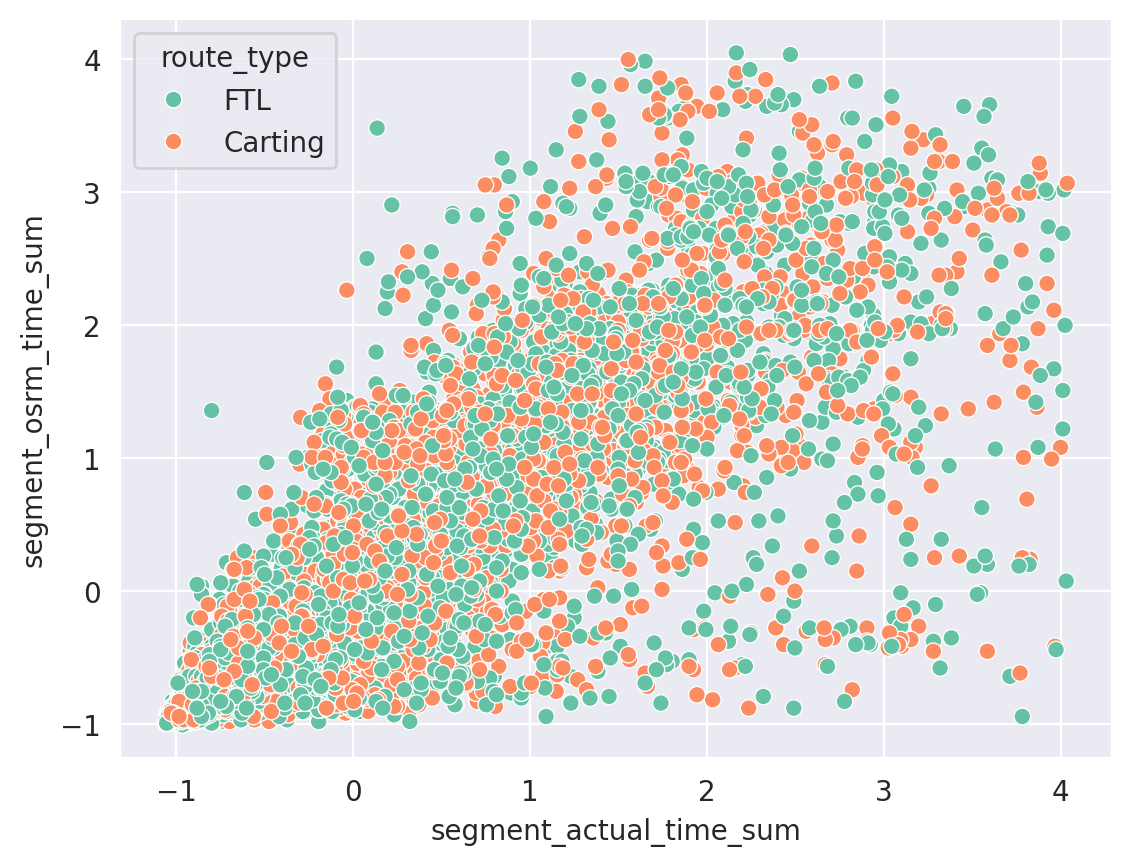

In [ ]:
plt.figure(dpi = 200)
sns.scatterplot(data = df3 , x = "segment_actual_time_sum" , y = "segment_osrm_time_sum" , hue = df2["route_type"])

<Axes: xlabel='segment_osrm_distance_sum', ylabel='osrm_distance'>

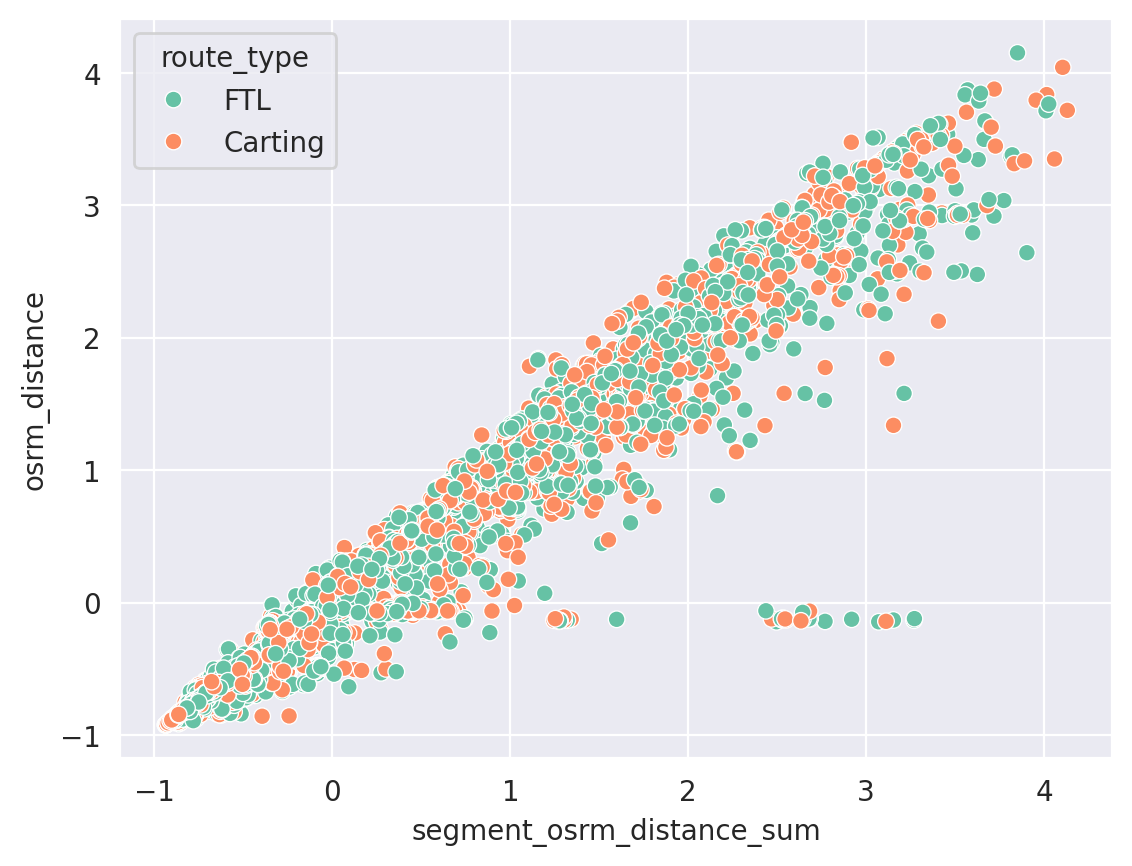

In [ ]:
plt.figure(dpi = 200)
sns.scatterplot(data = df3 , x = "segment_osrm_distance_sum" , y = "osrm_distance" , hue = df2["route_type"])

In [ ]:
print(df3['source_city'].value_counts()[:5])
print("--------------------------")
print(df3['destination_city'].value_counts()[:5])

source_city
bengaluru    1113
mumbai        966
gurgaon       745
bangalore     568
bhiwandi      540
Name: count, dtype: int64
--------------------------
destination_city
bengaluru    1206
mumbai       1200
gurgaon       610
delhi         477
hyderabad     411
Name: count, dtype: int64
